# Team ZM3 Sentiment analysis project 

### Members
1. Ndamulelo Innocent Nelwamondo
2. Thobekani Masondo
3. Nomvuselelo Simelane
4. John Sekgobela
5. Namhla Sokapase
6. Sandra Malope

In [1]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

In [2]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="KQ1UTh7hBvPLWlz3034oIgusG",
    project_name="global-warming-climate-change-sentiment-analysis-zm3",
    workspace="thobekanimasondo84-gmail-com",)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/thobekanimasondo84-gmail-com/global-warming-climate-change-sentiment-analysis-zm3/28558a04bd6d4f809f5376a250c0a1f6



## Problem statement

*Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.*

*With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.*

*Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.*

<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://en.reset.org/files/imagecache/sc_832x468/2018/02/27/planet_earth.jpg"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=500px/>

### To start with, lets import important packages for calling the data to the notebook and EDA 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
import re
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV



import string
import re # For regular expressions
import spacy
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from emoji import UNICODE_EMOJI

# Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

### Data Description
***The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:***
<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F8e4d65f2029797e0462b52022451829c%2Fdata.PNG?generation=1590752860255531&alt=media"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=500px/>


### Lets now call the data

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

### The rest of the Notebook is then divided into 6 sections

1. Explanatory data analysis(EDA) and Data cleaning
3. Data Prepocessing
4. Model Evaluation
5. Conclusion
6. Submission

# 1. Explanatory Data Analysis and Data Cleaning
<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://miro.medium.com/max/1360/1*TxamxmdIncBmo4TWIy1FQg.png"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=500px/>

In [6]:
from PIL import Image

In [7]:
print('Train dataset specifications')
print("")
train_df.info() #To see the first five rows in the train twitter dataset
print("")
print('Test dataset specifications')
print("")
test_df.info() #To see the first five rows in the test twitter dataset

Train dataset specifications

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB

Test dataset specifications

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


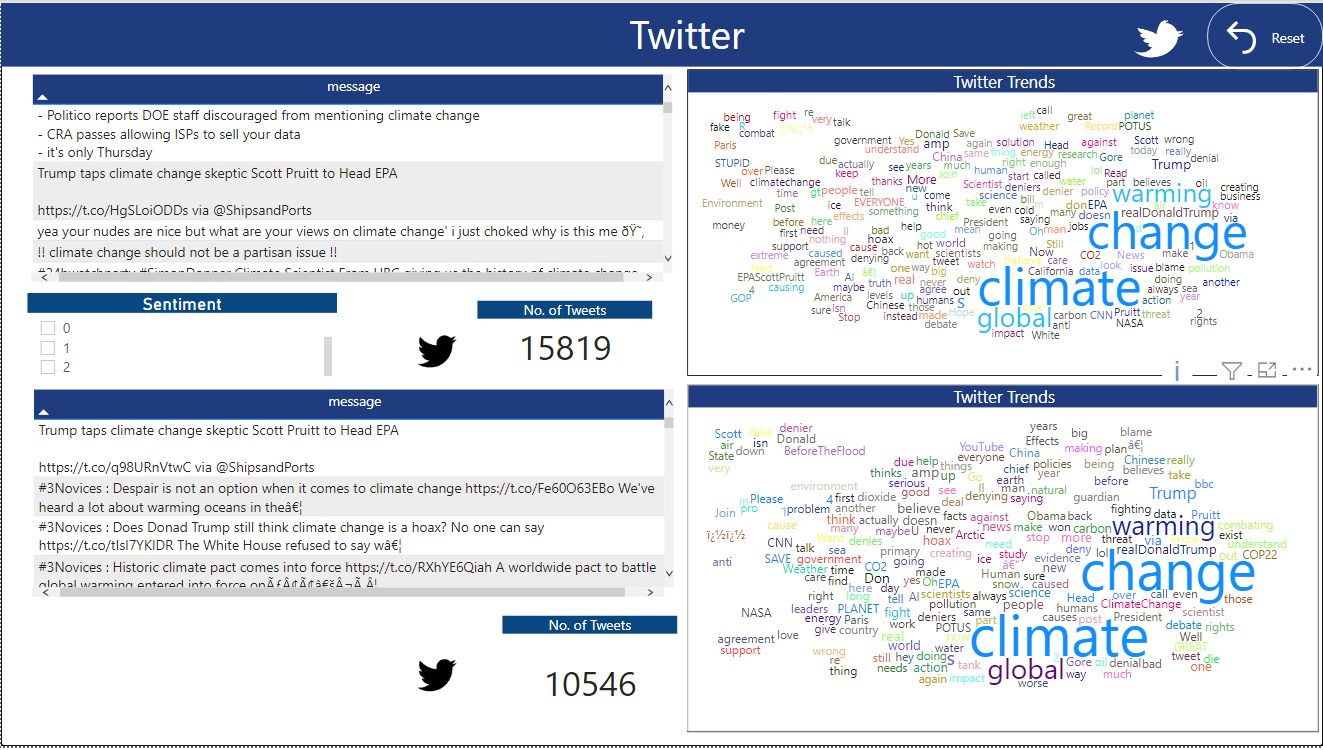

In [8]:
myImage = Image.open("eda.png")
myImage

### Since we working with people thoughts, we do not need web urls, numbers, punctuations and is always good to work with lower cases of text.

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format.  Some techniques are standard, but we have taken certain measures to limit the noise in the message column of our data.

For the EDSA - Climate Change Belief Analysis 2021 the dataset we will be doing the following steps:
* Removing the web-urls
* Making everything lower case
* Removing punctuation
* Splitting tweets
* Removing Emojis        
* Lemmatization           
* Stop words (Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information).

In [9]:
def tweet_preprocessing(tweet):
    
    '''
    This functions cleans tweets from line breaks, URLs, numbers, etc.
    '''
    
    tweet = tweet.lower() #To lower case
    tweet = tweet.replace('\n', ' ') # Remove line breaks
    tweet = tweet.replace('\@(\w*)', '') # Remove mentions
    tweet = re.sub(r"\bhttps://t.co/\w+", '', tweet) # Remove URLs
    tweet = re.sub('\w*\d\w*', '', tweet) # Remove numbers
    tweet = re.sub(r'\#', '', tweet) # Remove hashtags. To remove full hashtag: '\#(\w*)'
    tweet = re.sub('\w*\d\w*', '', tweet) # Removes numbers?
    tweet = re.sub(' +', ' ', tweet) # Remove 1+ spaces

    return tweet

In [10]:
def strip_emoji(text):
    
    '''
    This function removes any emojis
    '''
    
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags = re.UNICODE)
    return RE_EMOJI.sub(r'', text)

In [11]:
#Applying functions to clean tweets
train_df['clean_message'] = train_df['message'].apply(tweet_preprocessing)
train_df['clean_message'] = train_df['clean_message'].apply(strip_emoji)

In [12]:
#Applying functions to clean tweets
test_df['clean_message'] = test_df['message'].apply(tweet_preprocessing)
test_df['clean_message'] = test_df['clean_message'].apply(strip_emoji)

###### Now lets see what the data looks like after removing web-urls, punctuations and converting messages to text

In [13]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  
0  polyscimajor epa chief doesn't think carbon di...  
1  it's not like we lack evidence of anthropogeni...  
2  rt @rawstory: researchers say we have three ye...  
3  todayinmaker wired : was a pivotal year in the...  
4  rt @soynoviodetodas: it's , and a racist, sexi...

In [14]:
test_df.head()

message  tweetid  \
0  Europe will now be looking to China to make su...   169760   
1  Combine this with the polling of staffers re c...    35326   
2  The scary, unimpeachable evidence that climate...   224985   
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263   
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928   

                                       clean_message  
0  europe will now be looking to china to make su...  
1  combine this with the polling of staffers re c...  
2  the scary, unimpeachable evidence that climate...  
3  @karoli @morgfair @osborneink @dailykos putin ...  
4  rt @fakewillmoore: 'female orgasms cause globa...

In [15]:
df = train_df

In [16]:
#Tokanizing tweets
tt = TweetTokenizer()
df['clean_message'] = df['clean_message'].apply(tt.tokenize)
test_df['clean_message'] = test_df['clean_message'].apply(tt.tokenize)

In [17]:
#Cleaning tokens
df['clean_message'] = df['clean_message'].apply(lambda x: " ".join(x for x in x if re.match(r'[^\W\d]*$', x)))
test_df['clean_message'] = test_df['clean_message'].apply(lambda x: " ".join(x for x in x if re.match(r'[^\W\d]*$', x)))

In [18]:
# Lemmatizing

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['clean_message'] = df['clean_message'].apply(lemmatize_text)
test_df['clean_message'] = test_df['clean_message'].apply(lemmatize_text)

In [19]:
df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  
0  [polyscimajor, epa, chief, think, carbon, diox...  
1  [not, like, we, lack, evidence, of, anthropoge...  
2  [rt, researcher, say, we, have, three, year, t...  
3  [todayinmaker, wired, wa, a, pivotal, year, in...  
4  [rt, and, a, racist, sexist, climate, change, ...

In [20]:
test_df.head()

message  tweetid  \
0  Europe will now be looking to China to make su...   169760   
1  Combine this with the polling of staffers re c...    35326   
2  The scary, unimpeachable evidence that climate...   224985   
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263   
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928   

                                       clean_message  
0  [europe, will, now, be, looking, to, china, to...  
1  [combine, this, with, the, polling, of, staffe...  
2  [the, scary, unimpeachable, evidence, that, cl...  
3  [putin, got, to, you, too, jill, trump, believ...  
4  [rt, female, orgasm, cause, global, warming, s...

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Webster\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
#Removing stop words
stop = stopwords.words('english')
df['clean_message'] = df['clean_message'].apply(lambda x: " ".join(x for x in x if x not in stop))
test_df['clean_message'] = test_df['clean_message'].apply(lambda x: " ".join(x for x in x if x not in stop))

In [23]:
#Removing words that are negative but not negative in the climate setting
to_remove = ['fight', 'fighting', 'crisis', 'threat', 'threaten', 'risk', ]

df['clean_message'] = df['clean_message'].apply(lambda x: " ".join(x for x in x.split() if x not in to_remove))
test_df['clean_message'] = test_df['clean_message'].apply(lambda x: " ".join(x for x in x.split() if x not in to_remove))

In [24]:
#Removing words that are negative but not negative in the climate setting
to_remove = ['fight', 'fighting', 'crisis']

df['clean_message'] = df['clean_message'].apply(lambda x: " ".join(x for x in x.split() if x not in to_remove))
test_df['clean_message'] = test_df['clean_message'].apply(lambda x: " ".join(x for x in x.split() if x not in to_remove))

In [25]:
#Sentiment with vader
analyzer = SentimentIntensityAnalyzer()

scores = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(df['clean_message'].shape[0]):
    compound = analyzer.polarity_scores(df['clean_message'][i])["compound"]
    pos = analyzer.polarity_scores(df['clean_message'][i])["pos"]
    neu = analyzer.polarity_scores(df['clean_message'][i])["neu"]
    neg = analyzer.polarity_scores(df['clean_message'][i])["neg"]
    
    scores.append({"comp": compound,
                       "positive": pos,
                       "negative": neg,
                       "neutral": neu
                  })
    
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
test_df = test_df.join(sentiments_score)

###### Lets explore the train dataset

In [26]:
df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message    comp  positive  \
0  polyscimajor epa chief think carbon dioxide ma...  0.1531     0.127   
1    like lack evidence anthropogenic global warming  0.2023     0.436   
2  rt researcher say three year act climate chang...  0.0000     0.000   
3  todayinmaker wired wa pivotal year war climate... -0.5994     0.000   
4  rt racist sexist climate change denying bigot ... -0.7506     0.000   

   negative  neutral  
0     0.000    0.873  
1     0.245    0.319  
2     0.000    1.000  
3     0.358    0.642  
4     0.444    0.556

In [27]:
test_df.head()

message  tweetid  \
0  Europe will now be looking to China to make su...   169760   
1  Combine this with the polling of staffers re c...    35326   
2  The scary, unimpeachable evidence that climate...   224985   
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263   
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928   

                                       clean_message    comp  positive  \
0  europe looking china make sure alone climate c...  0.1531     0.127   
1  combine polling staffer climate change woman r...  0.2023     0.436   
2  scary unimpeachable evidence climate change al...  0.0000     0.000   
3  putin got jill trump believe climate change th... -0.5994     0.000   
4  rt female orgasm cause global warming sarcasti... -0.7506     0.000   

   negative  neutral  
0     0.000    0.873  
1     0.245    0.319  
2     0.000    1.000  
3     0.358    0.642  
4     0.444    0.556

Seems pretty cool to what is wanted

<AxesSubplot:xlabel='positive'>

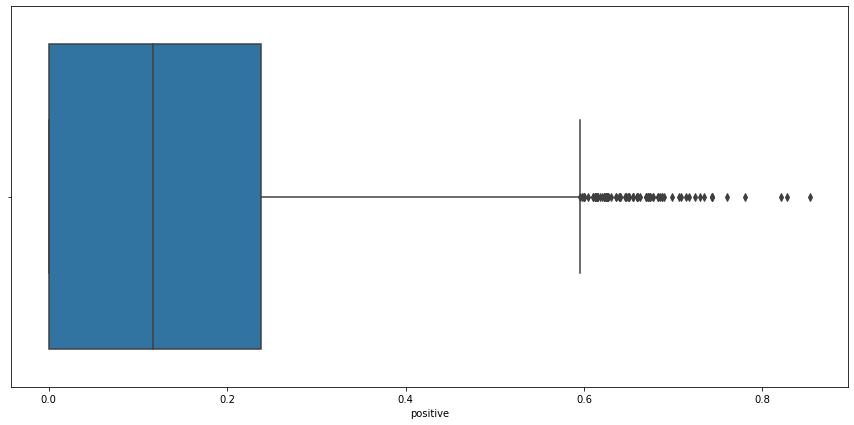

In [28]:
#Distribution of polarity
plt.figure(figsize=(15, 7))
sns.boxplot(x = df['positive'])

- 

<AxesSubplot:xlabel='negative'>

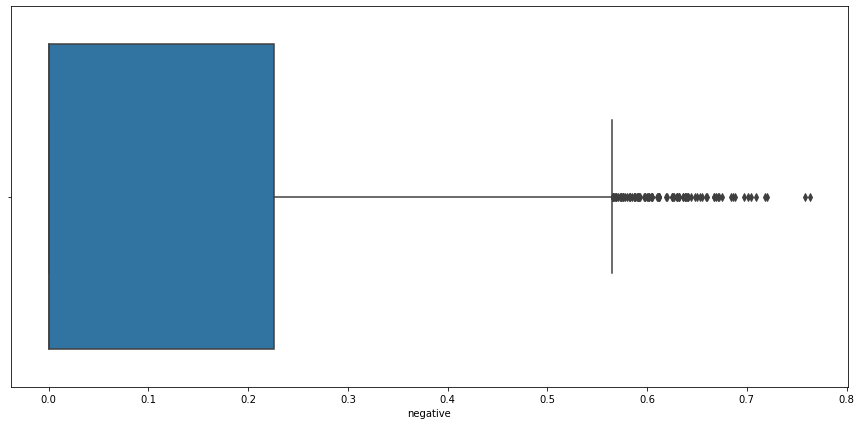

In [29]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = df['negative'])

- 

In [32]:
#Getting number of values in each category
sentiment_dist = df['sentiment'].value_counts().to_frame().reset_index().rename(columns={'index': 'sentiment', 'sentiment': 'count'})
sentiment_dist

sentiment  count
0          1   8530
1          2   3640
2          0   2353
3         -1   1296

<AxesSubplot:xlabel='sentiment', ylabel='count'>

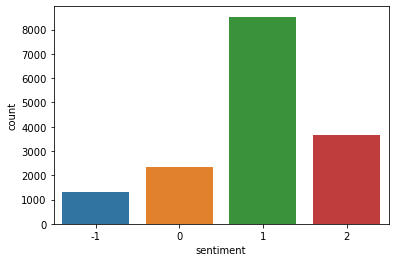

In [33]:
sns.barplot(x=sentiment_dist['sentiment'], y=sentiment_dist['count'])

- According to the count, 53% of people believe in climate change

###### Now lets get into some interesting stuff like extracting of hashtags and mentions from twitter messaage

In [34]:
#Extracting hashtags
df['hashtags'] = df['message'].str.findall(r'\#(\w*)').apply(', '.join)

In [35]:
#Most popular hashtags
hashtags_popular = df.message.str.extractall(r'\#(\w*)')[0].value_counts()
#Most popular mentions
mentions_popular = df.message.str.extractall(r'\@(\w*)')[0].value_counts()

In [36]:
hashtags_popular.nlargest(30)

climate             343
climatechange       153
BeforeTheFlood      137
Trump                77
COP22                75
environment          68
ParisAgreement       65
ImVotingBecause      62
ActOnClimate         42
ClimateChange        41
Ã                    39
IVotedBecause        33
globalwarming        31
auspol               29
science              27
p2                   26
MAGA                 23
news                 21
climatemarch         18
GlobalWarming        18
BeforetheFlood       17
EPA                  16
ClimateCounts        14
EarthDay             14
GreatBarrierReef     13
NoDAPL               13
qanda                12
TrumpNÃ              12
Science              12
Resist               11
Name: 0, dtype: int64

###### Climate was the most popular hashtag with 343 number of counts

###### Top 5 popular hashtags

###### 1. climate             343
###### 2. climatechange       153
###### 3. BeforeTheFlood      137
###### 4. Trump                77
###### 5. COP22  

###### Now lets see the head of the dataset with hashtags

In [37]:
df.head(5)

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message    comp  positive  \
0  polyscimajor epa chief think carbon dioxide ma...  0.1531     0.127   
1    like lack evidence anthropogenic global warming  0.2023     0.436   
2  rt researcher say three year act climate chang...  0.0000     0.000   
3  todayinmaker wired wa pivotal year war climate... -0.5994     0.000   
4  rt racist sexist climate change denying bigot ... -0.7506     0.000   

   negative  neutral        hashtags  
0     0.000    0.873                  
1     0.245    0.319                  
2     0.000    1.000                  
3     0.358    0.642  TodayinMaker,   
4     0.444    0.556   ElectionNight

###### Now lets define a function that will generate all the popular hashtags with font size increasing with number of counts

In [38]:
def generate_wordcloud(x):
    
    x = x[5:] #Taking out climate change hashtags

    word_cloud = WordCloud(width=2000,height=1000, random_state=21, max_font_size=200, background_color=
                      'white', min_word_length=3, max_words=70).generate_from_frequencies(x)
    plt.figure(facecolor = 'white', edgecolor='blue', dpi=600)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    #plt.show()

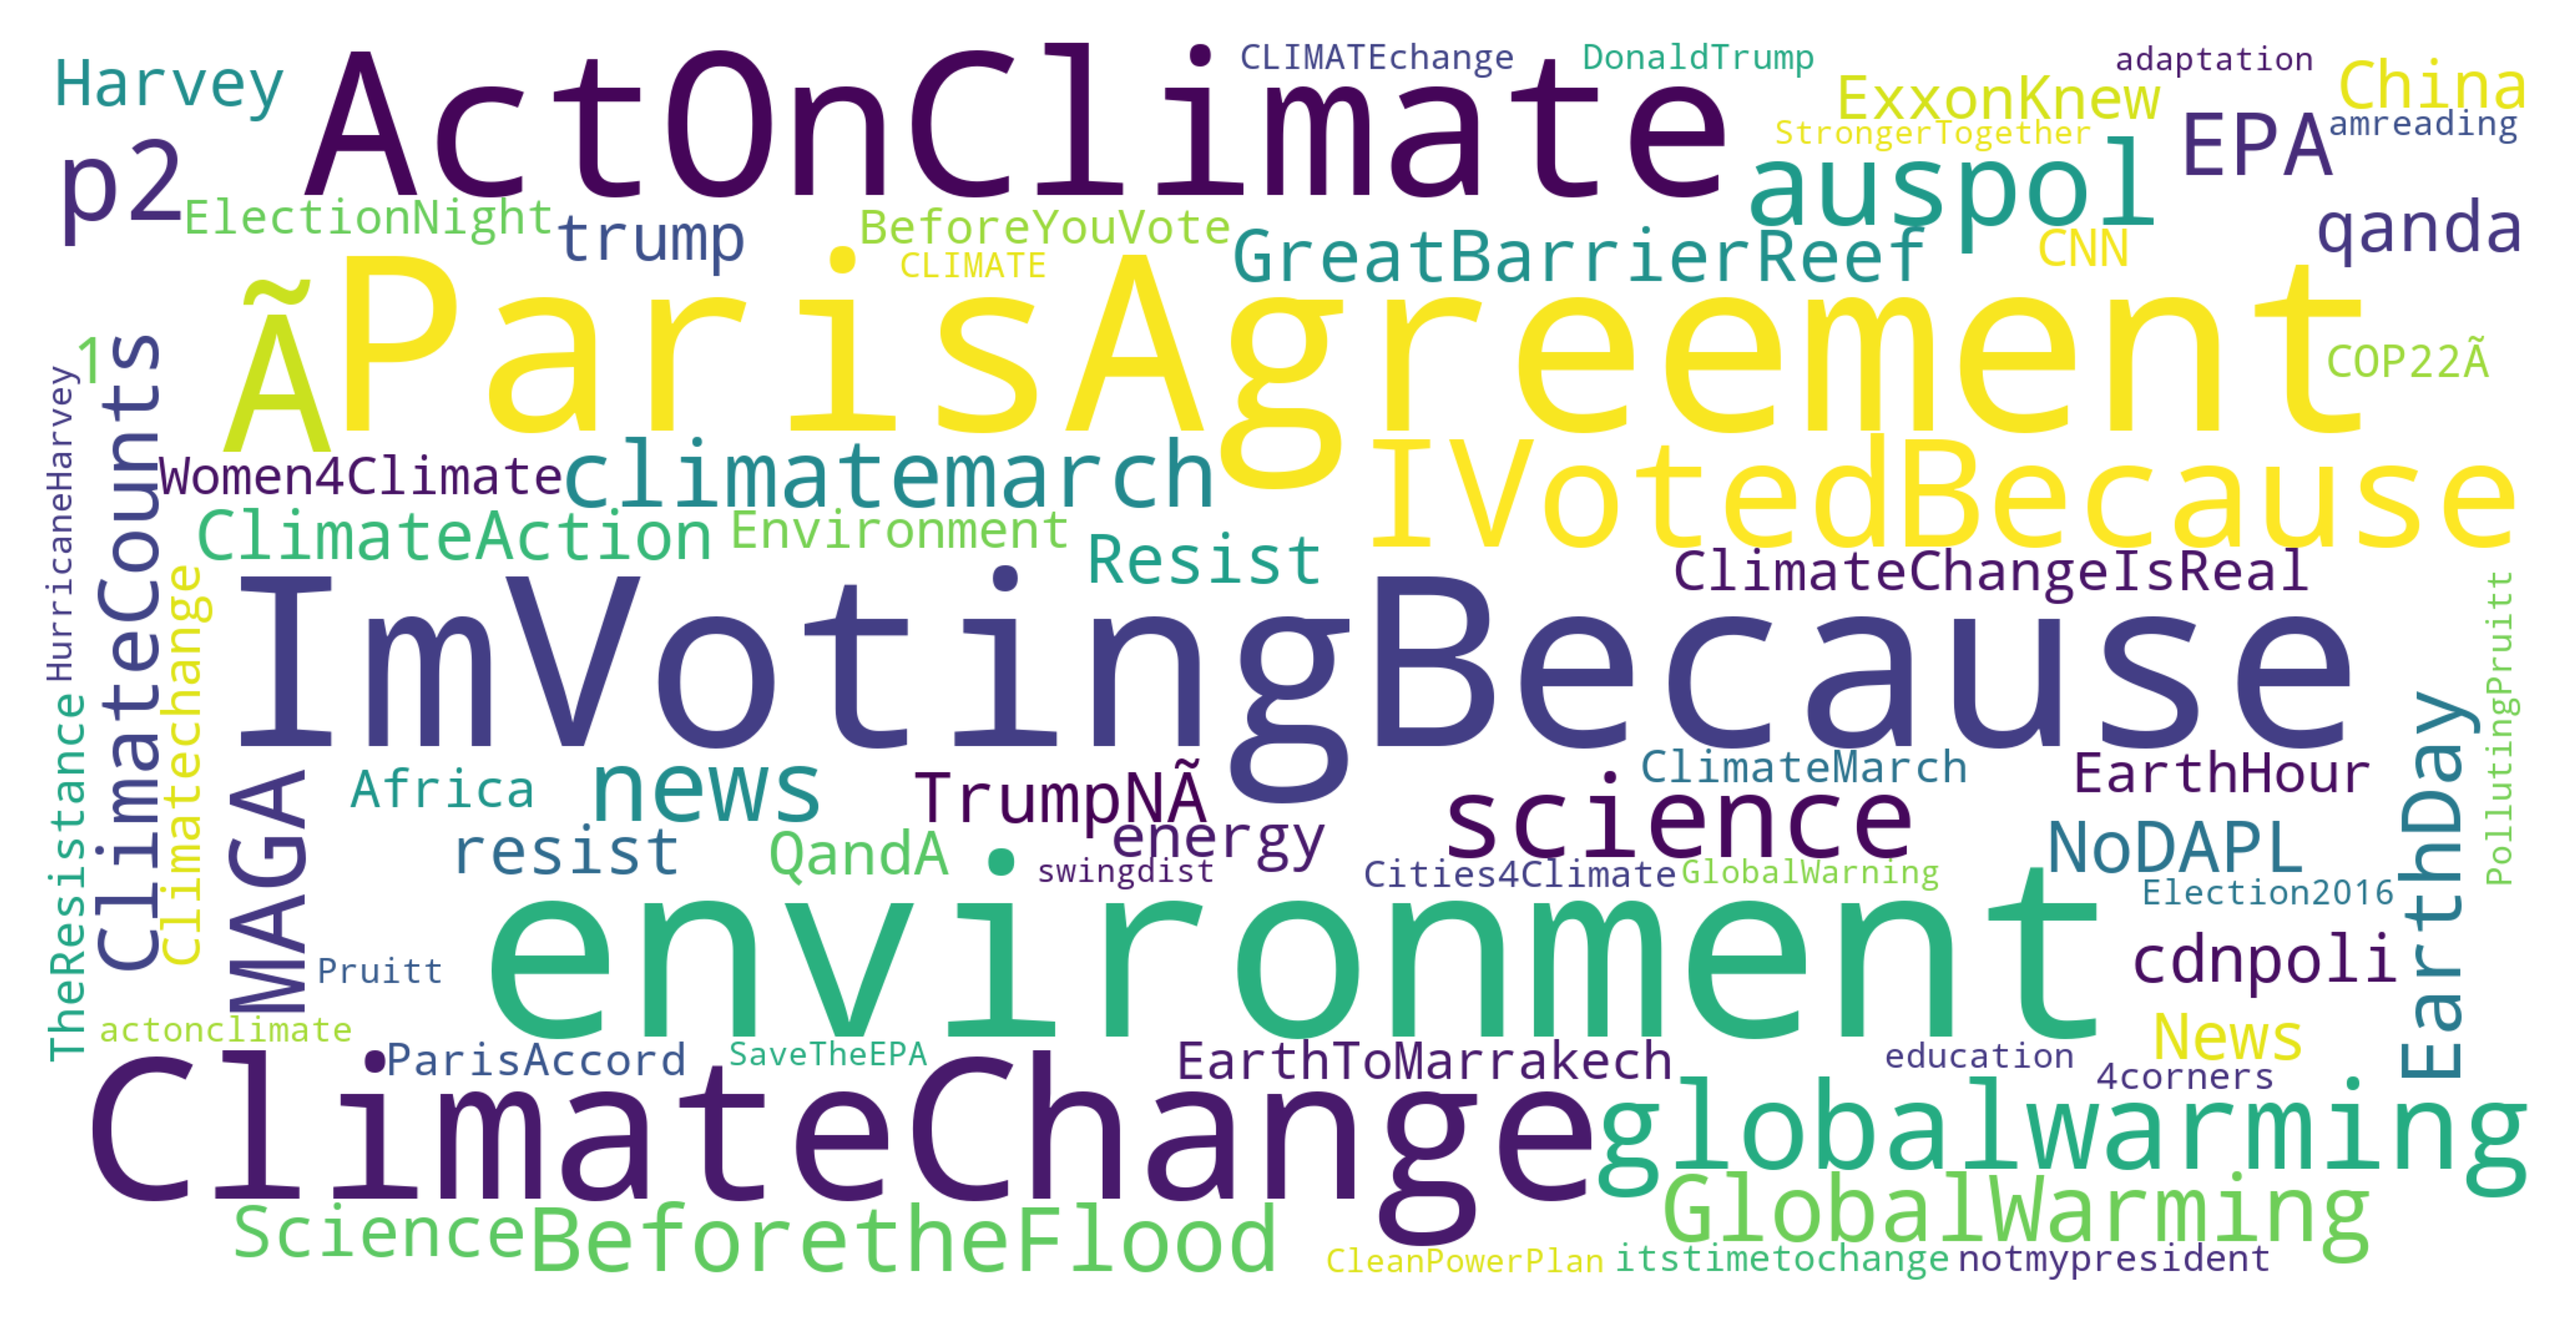

In [39]:
generate_wordcloud(hashtags_popular)
plt.savefig('a_popularhashtags.png')

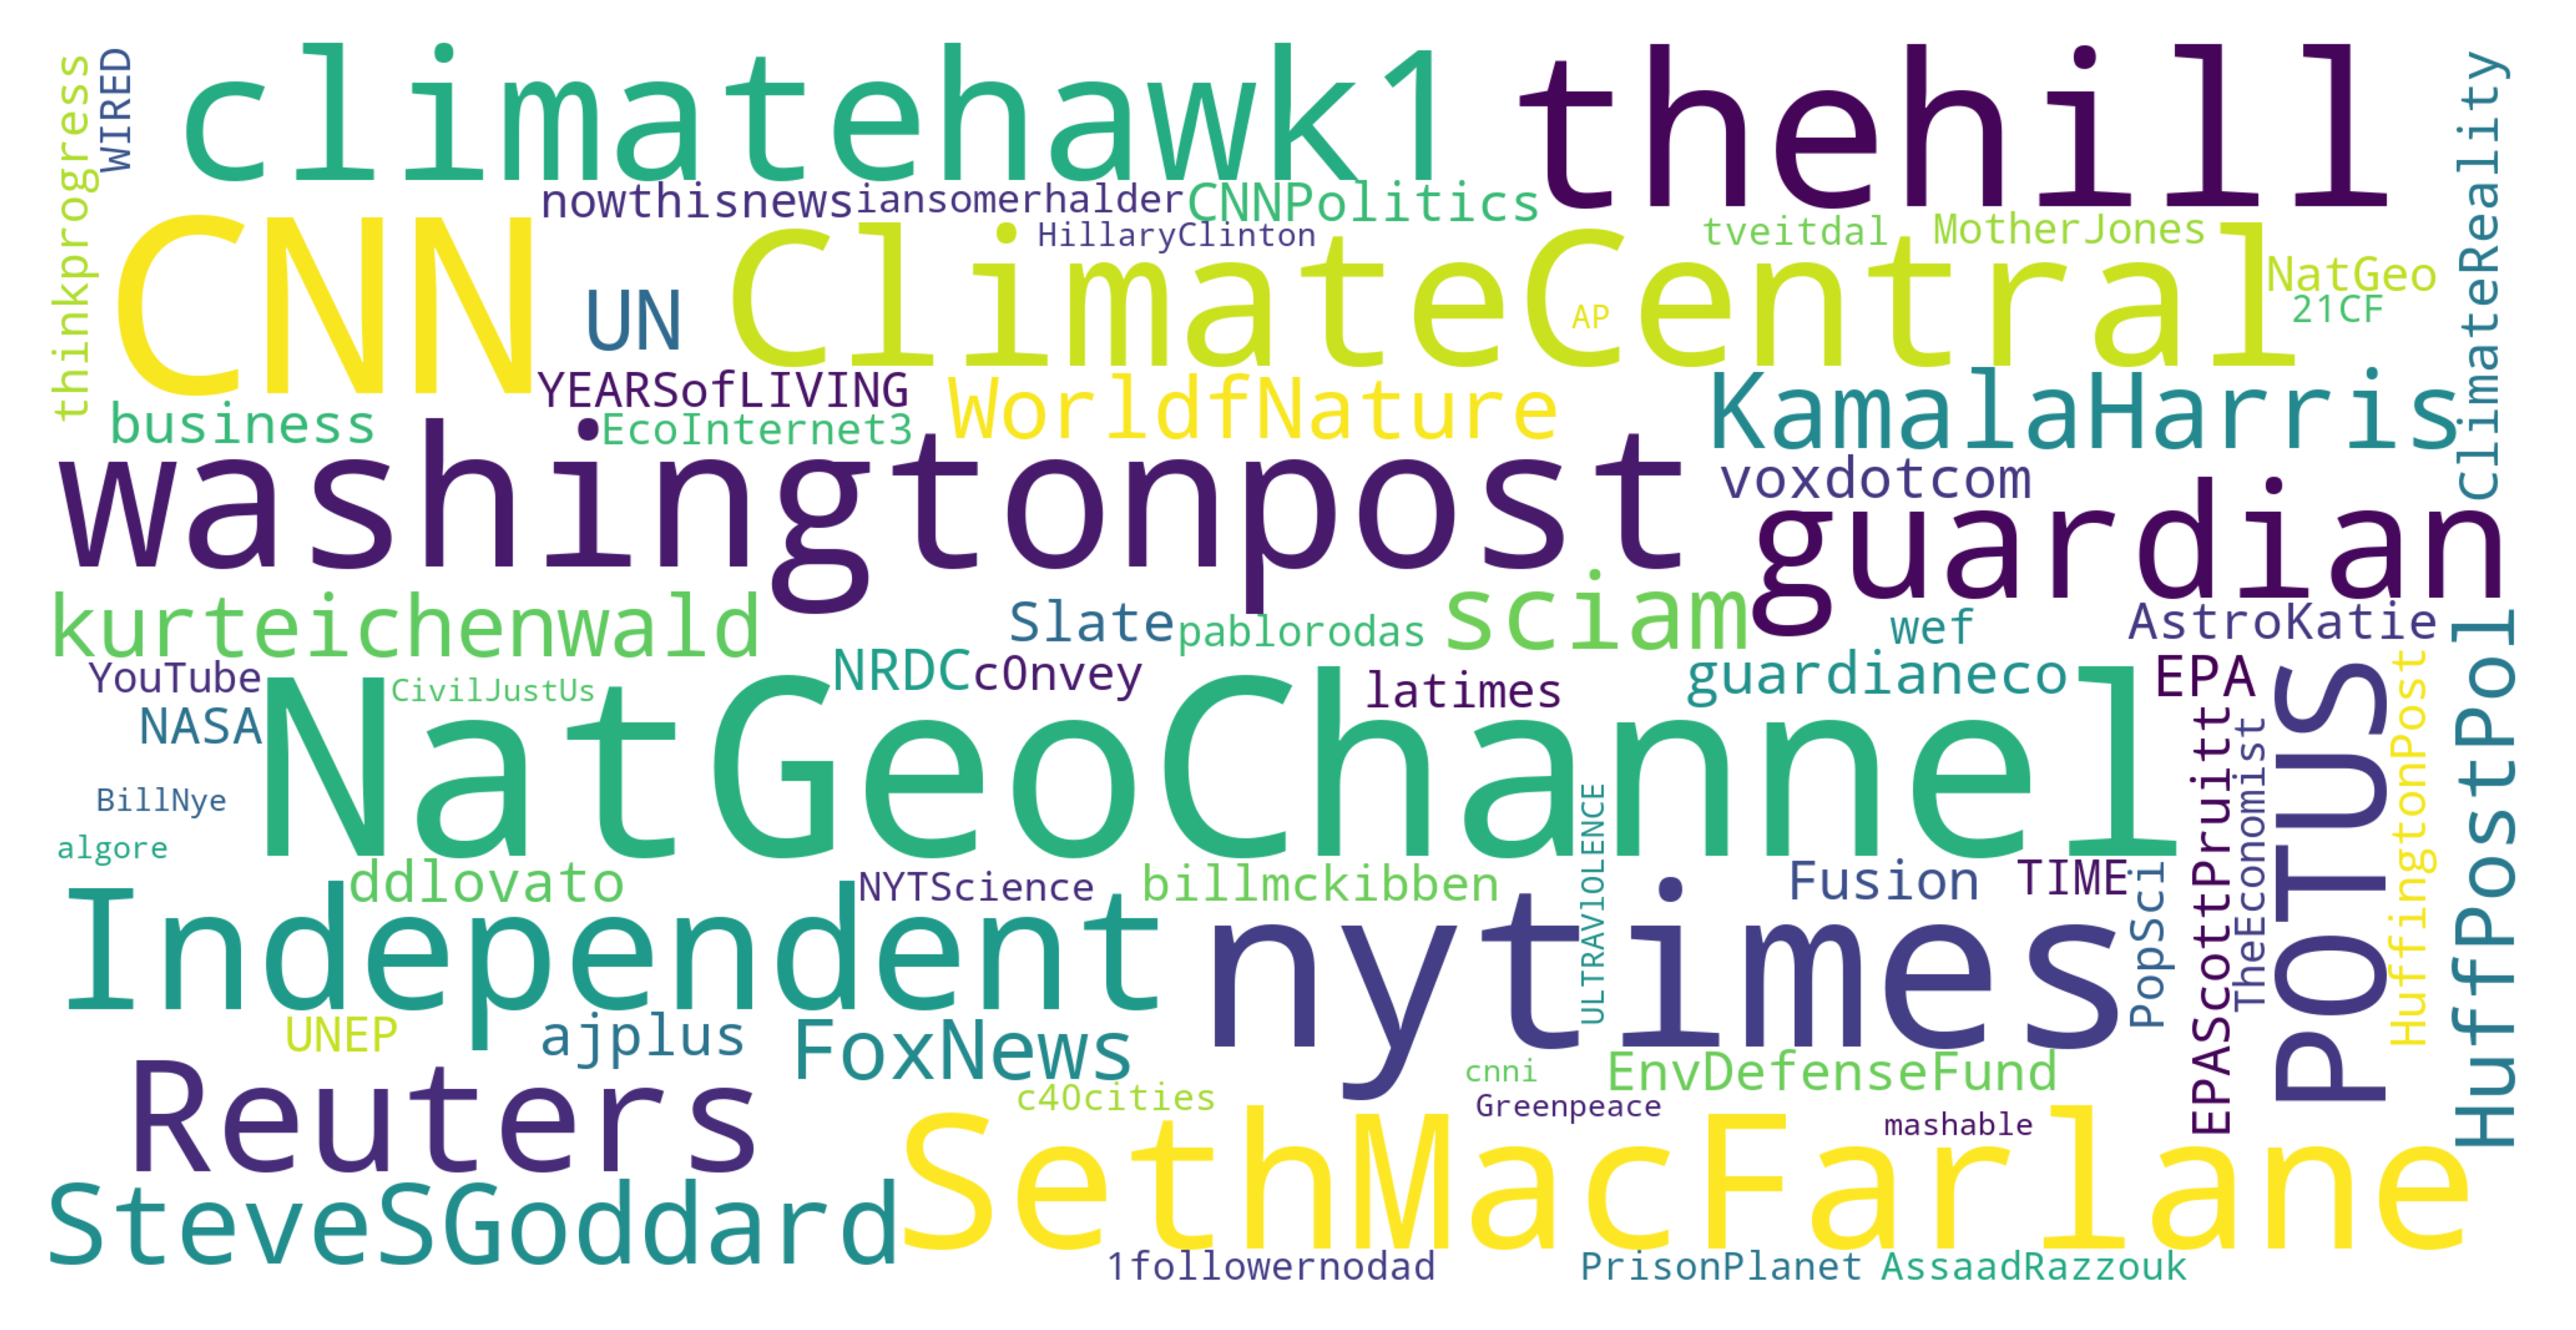

In [40]:
generate_wordcloud(mentions_popular)
plt.savefig('a_popularmentions.png')

## Now we switching gears, we moving to the most common words in the twitter messages

In [41]:
import nltk 
nltk.download('punkt')

reviews = ''

for review in df['clean_message']:
    reviews += review

corpus = nltk.sent_tokenize(reviews)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Webster\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [43]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys())]

In [44]:
corpus.sort(reverse = True)
corpus

[(12668, 'climate'),
 (10582, 'change'),
 (3621, 'global'),
 (3359, 'â'),
 (2792, 'warming'),
 (1830, 'trump'),
 (1323, 'ârt'),
 (1263, 'changert'),
 (1106, 'believe'),
 (906, 'u'),
 (729, 'say'),
 (646, 'going'),
 (638, 'ã'),
 (575, 'world'),
 (554, 'people'),
 (552, 'think'),
 (545, 'real'),
 (524, 'ha'),
 (496, 'new'),
 (480, 'scientist'),
 (454, 'warmingrt'),
 (442, 'epa'),
 (428, 'like'),
 (408, 'die'),
 (395, 'wa'),
 (386, 'science'),
 (356, 'year'),
 (349, 'denier'),
 (348, 'thinking'),
 (344, 'donald'),
 (333, 'right'),
 (332, 'need'),
 (324, 'know'),
 (322, 'make'),
 (316, 'hoax'),
 (313, 'husband'),
 (305, 'president'),
 (304, 'cause'),
 (297, 'action'),
 (292, 'want'),
 (286, 'could'),
 (278, 'viart'),
 (257, 'one'),
 (244, 'time'),
 (240, 'take'),
 (239, 'get'),
 (238, 'would'),
 (238, 'pruitt'),
 (237, 'china'),
 (233, 'stop'),
 (231, 'human'),
 (230, 'energy'),
 (217, 'å'),
 (217, 'issue'),
 (215, 'leader'),
 (214, 'thing'),
 (213, 'due'),
 (212, 'still'),
 (207, 'million

In [45]:
#Lets take a look at the negative twitts
df_neg = df[df['sentiment'] == -1]
df_neg.head()

sentiment                                            message  tweetid  \
28         -1  Sally Kohn’s latest evidence of climate change...   355491   
46         -1  @realDonaldTrump Carbon Tax is a Globalist ide...    61141   
48         -1  RT @SteveSGoddard: We had winds close to 100 M...   719523   
56         -1  @MissLizzyNJ lmao 😂 snowflakes ❄️ complaining ...   911385   
57         -1  RT @Dawn2334Dawn: This is ONE of Arnold Schwar...   768263   

                                        clean_message    comp  positive  \
28  sally kohn latest evidence climate change prof...  0.4019     0.197   
46  carbon tax globalist idea enslave population w... -0.5423     0.109   
48  rt wind close mph area afternoon would blame c... -0.3400     0.000   
56  lmao snowflake complaining snowflake winter gl...  0.5719     0.487   
57  rt one arnold vehicle whining climate change m... -0.6705     0.000   

    negative  neutral hashtags  
28     0.000    0.803           
46     0.279    0.612           
48     0.167    0.833           
56     0.159    0.354           
57     0.407    0.593

###### Lets dig a little deeper to see what are those popular negative hashtags

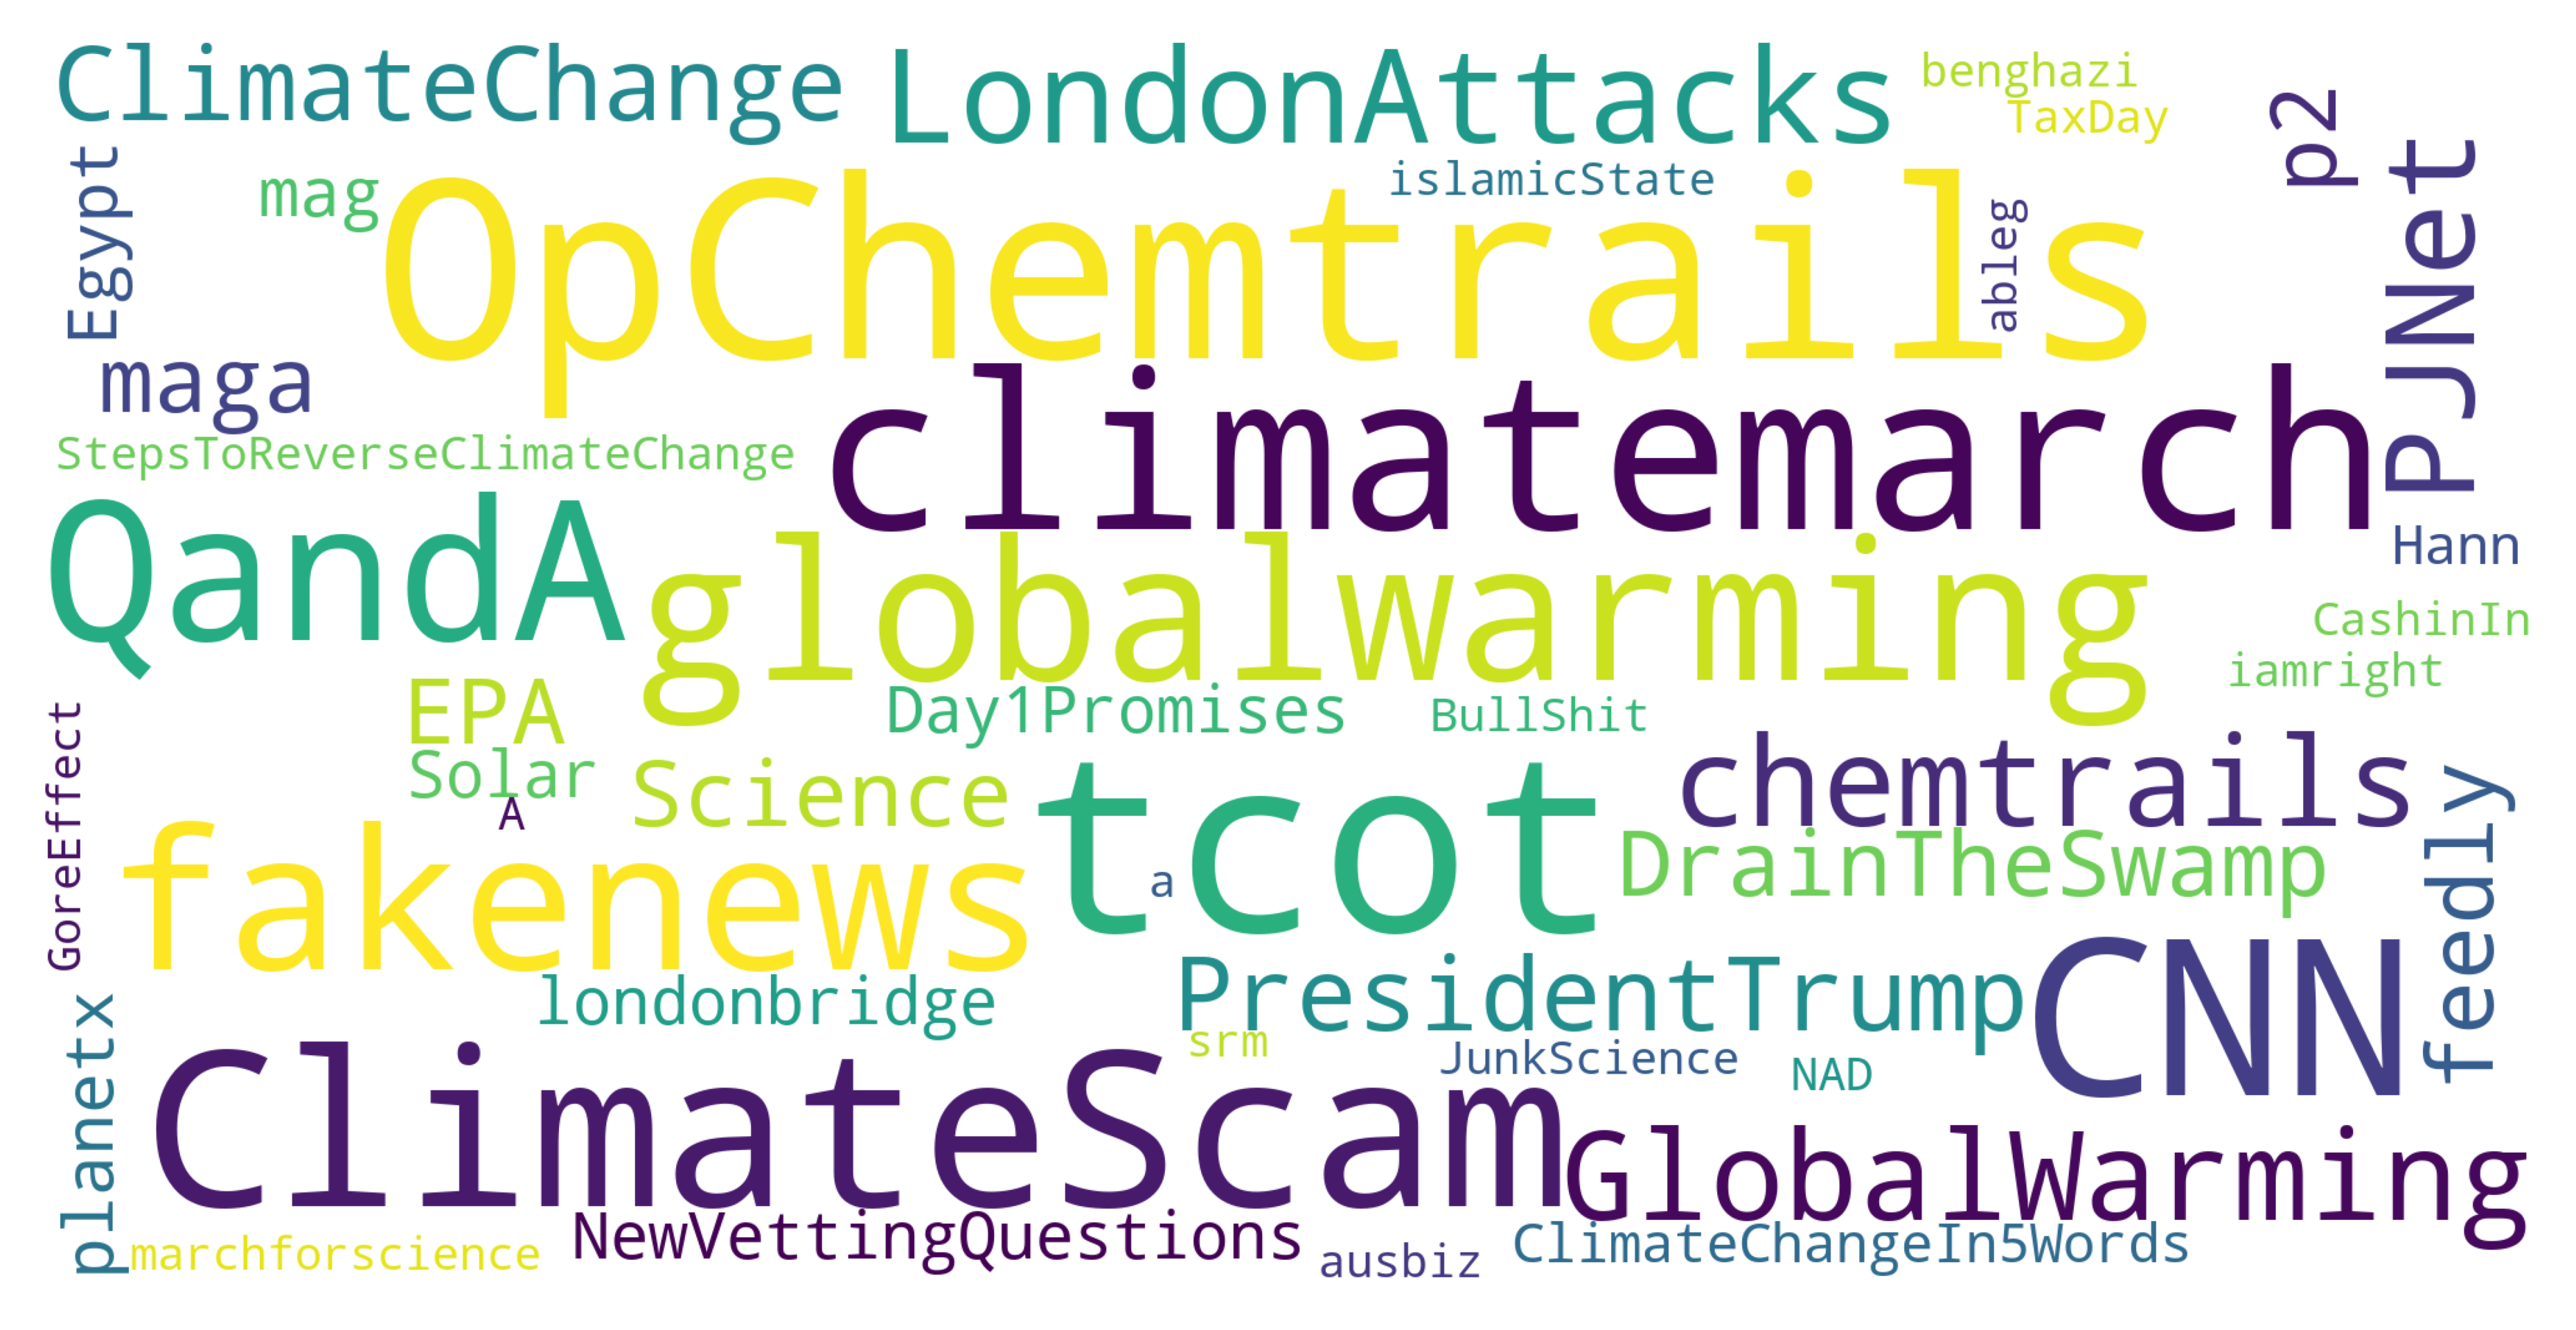

In [46]:
#Popular negative hashtags
hashtags_popular_neg = df_neg.message.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(50)

generate_wordcloud(hashtags_popular_neg)
plt.savefig('a_neg_popularhashtags.png')

###### Since we have extracted the negatives, lets now move to popular positive hashtags

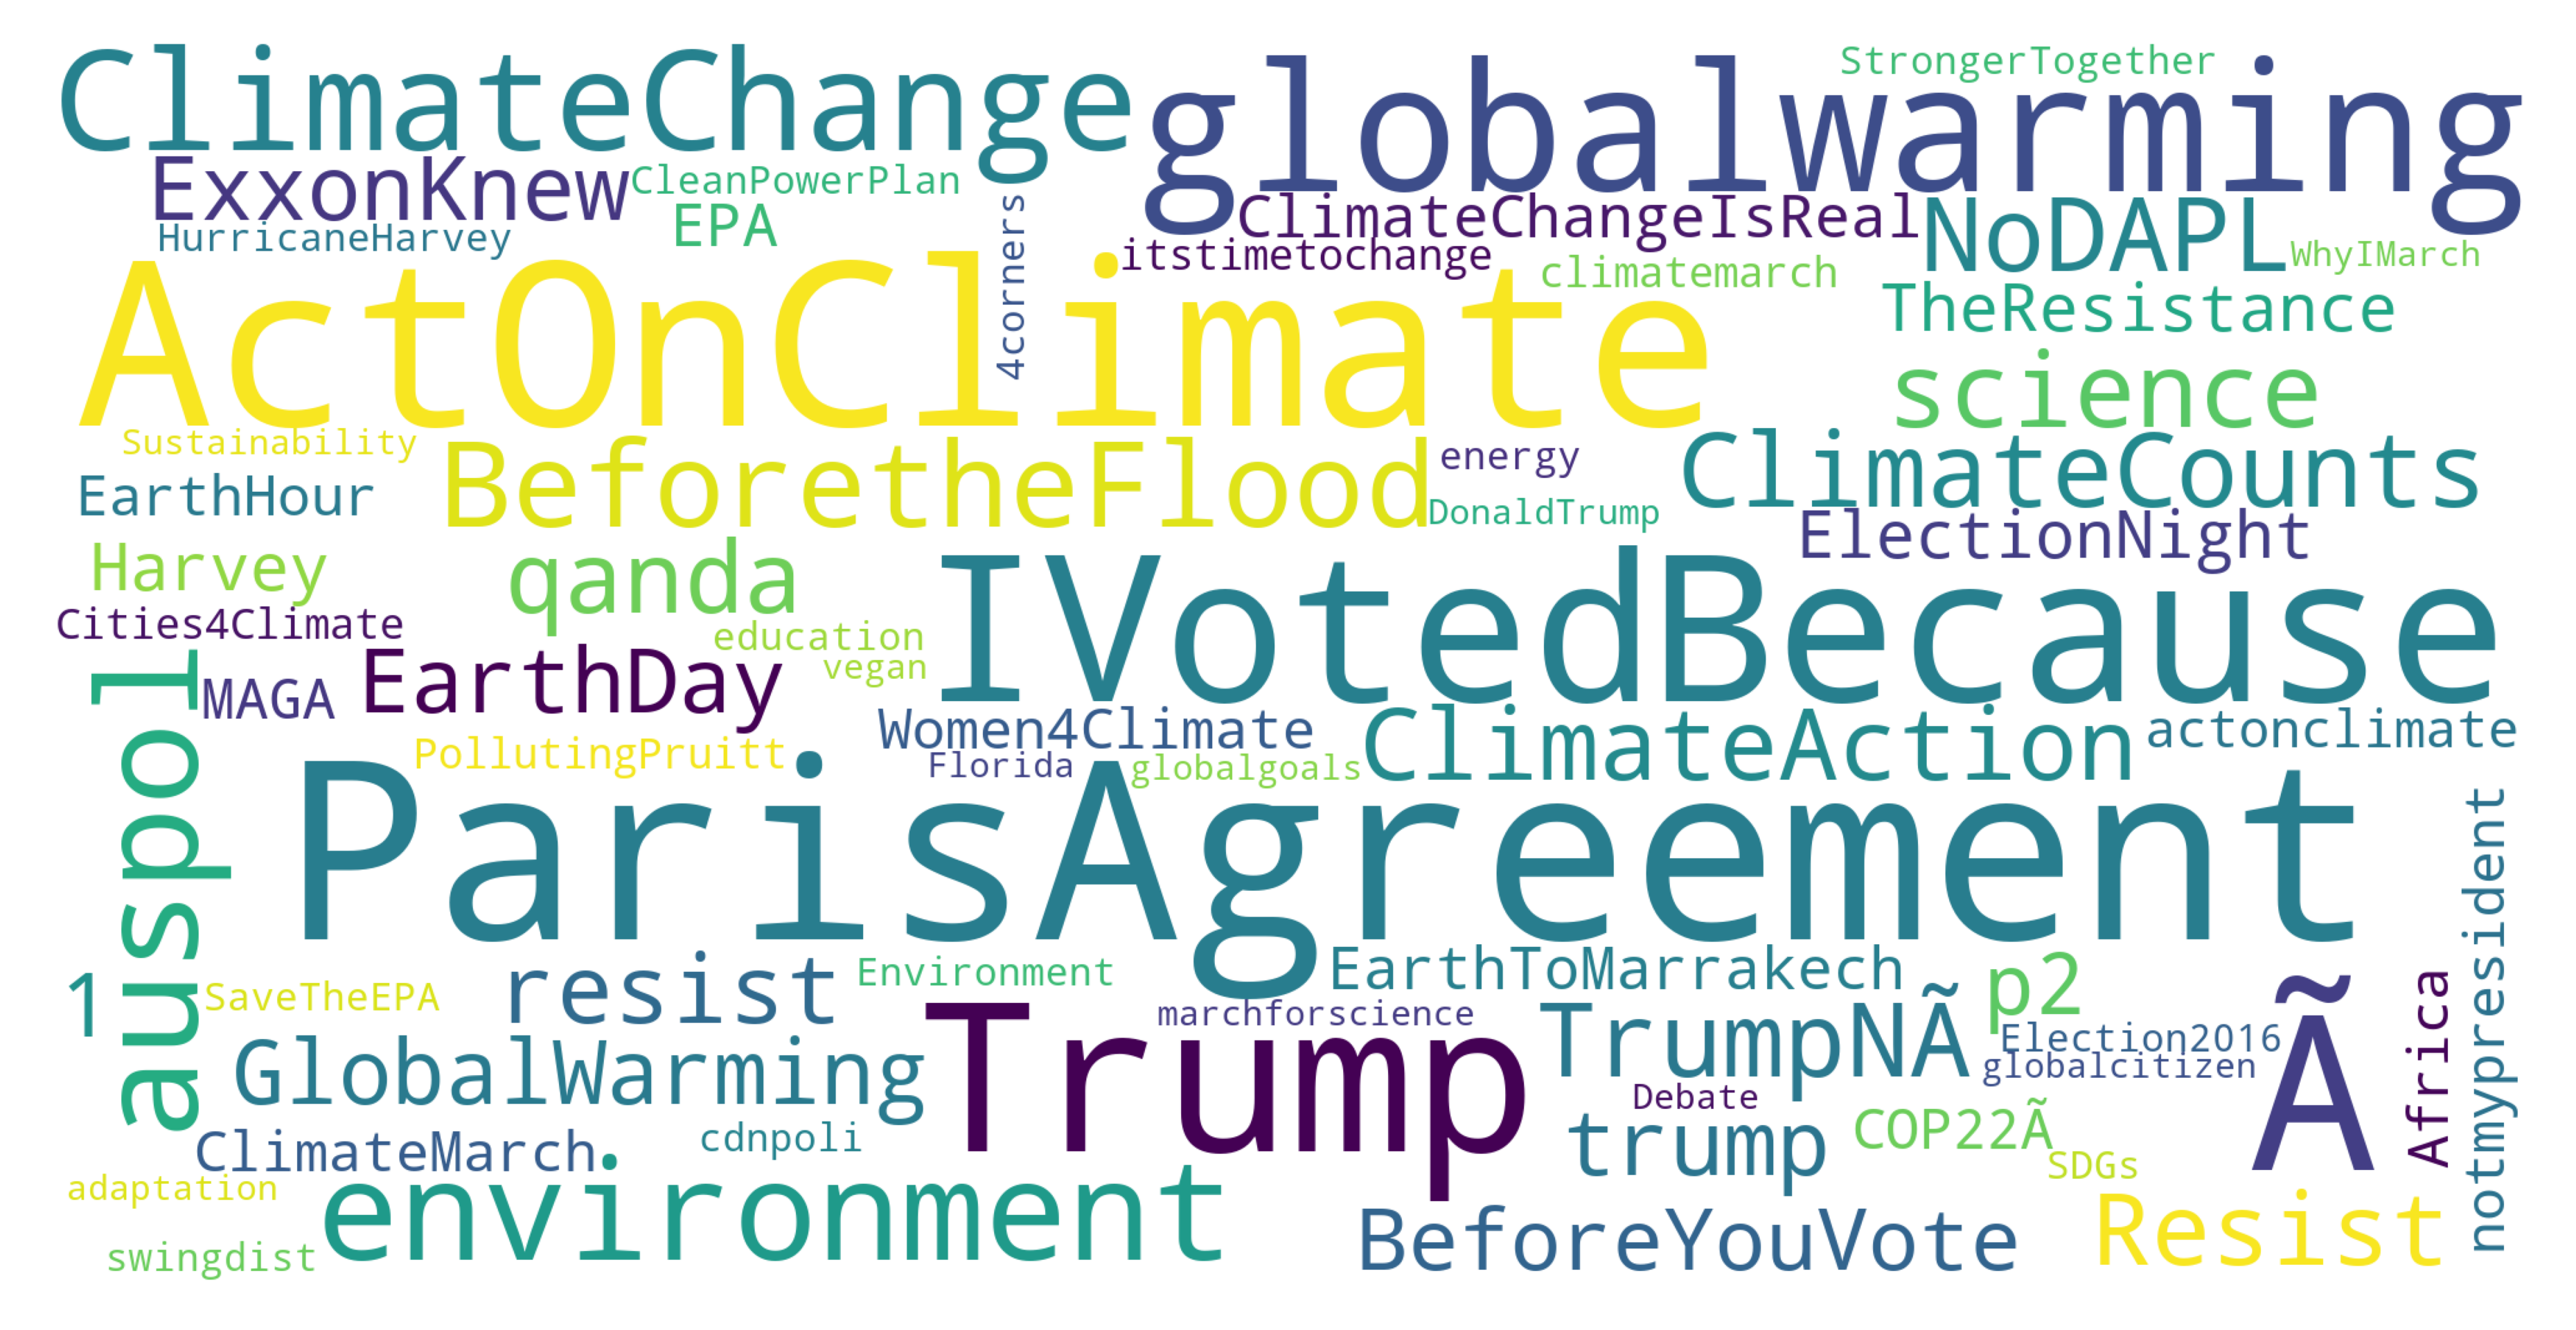

In [47]:
df_pos = df[df['sentiment'] == 1]

hashtags_popular_pos = df_pos.message.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)

generate_wordcloud(hashtags_popular_pos)
plt.savefig('a_pos_popularhashtags.png')

# 3. Data Preprocessing

###### Now that our data is about to be ready for analysis, lets get a bit deeper by dividing the texts in to words. And to do that, we must tokenize.

In [48]:
import nltk # For text manipulation
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Webster\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
X = df['clean_message']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10) #Splitting the datat into training nd testing set

Now that we've tokenize the data lets now prepare it for analysis, this is by dividing our predictions and messages

# 4. Models

In [50]:

pd.set_option("display.max_colwidth", 200)


In [51]:
#Base models
names = ['Logistic Regression','Random Forest', 'Nearest Neighbors', 
         'Decision Tree','MultinomialNB','Linear SVC', 'XG Boost']

In [52]:
# List of classifiers
classifiers = [
    Pipeline([('tfid', TfidfVectorizer(max_df = 0.4,
                                      smooth_idf = True,
                                      stop_words = 'english',
                                      ngram_range = (1,2))),
             ('clf', LogisticRegression())]),
    Pipeline([('tfid', TfidfVectorizer(max_df = 0.4,
                                      smooth_idf = True,
                                      stop_words = 'english',
                                      ngram_range = (1,2))),
             ('clf', RandomForestClassifier())]),
    Pipeline([('tfid', TfidfVectorizer(max_df = 0.4,
                                      smooth_idf = True,
                                      stop_words = 'english',
                                      ngram_range = (1,2))),
             ('clf', KNeighborsClassifier())]),
    Pipeline([('tfid', TfidfVectorizer(max_df = 0.4,
                                      smooth_idf = True,
                                      stop_words = 'english',
                                      ngram_range = (1,2))),
             ('clf', DecisionTreeClassifier())]),
    Pipeline([('tfid', TfidfVectorizer(max_df = 0.4,
                                      smooth_idf = True,
                                      stop_words = 'english',
                                      ngram_range = (1,2))),
             ('clf', MultinomialNB())]),
    Pipeline([('tfid', TfidfVectorizer(max_df = 0.4,
                                      smooth_idf = True,
                                      stop_words = 'english',
                                      ngram_range = (1,2))),
             ('clf', LinearSVC())]),
        Pipeline([('tfid', TfidfVectorizer(max_df = 0.4,
                                      smooth_idf = True,
                                      stop_words = 'english',
                                      ngram_range = (1,2))),
             ('clf', XGBClassifier())])
]

In [54]:
!pip install graphviz

In [55]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train) #Training the model
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    models[name] = clf #Storing the trained models in the models dictionary    
    
    results.append([name, run_time.best]) 

    
results = pd.DataFrame(results, columns=['Classifier', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

... predicting
Fitting Random Forest model...
... predicting
Fitting Nearest Neighbors model...
... predicting
Fitting Decision Tree model...
... predicting
Fitting MultinomialNB model...
... predicting
Fitting Linear SVC model...
... predicting
Fitting XG Boost model...


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py:17: UserWarning: Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html
  warnings.warn(f'Old style callback is deprecated.  See: {link}', UserWarning)


... predicting


In [ ]:
#Logistic Regresion
lr = models['Logistic Regression']
t = test_df['clean_message']
y_pred_lr = lr.predict(t)
sub = pd.DataFrame( data = {'tweetid': test_df['tweetid'],
                             'sentiment': y_pred_lr })
sub.to_csv('submission_lr2.csv', index = False)

#Random forest
rf = models['Random Forest']
y_pred_rf = rf.predict(t)
sub = pd.DataFrame( data = {'tweetid': test_df['tweetid'],
                             'sentiment': y_pred_rf })
sub.to_csv('submission_fr.csv', index = False)

#Nearest Neighbors
nn = models['Nearest Neighbors']
y_pred_nn = nn.predict(t)
sub = pd.DataFrame( data = {'tweetid': test_df['tweetid'],
                             'sentiment': y_pred_nn})
sub.to_csv('submission_nn.csv', index = False)

#Decision Tree
dt = models['Decision Tree']
y_pred_dt = dt.predict(t)
sub = pd.DataFrame( data = {'tweetid': test_df['tweetid'],
                             'sentiment': y_pred_dt })
sub.to_csv('submission_dt.csv', index = False)

#MultinomialNB
m = models['MultinomialNB']
y_pred_m = m.predict(t)
sub = pd.DataFrame( data = {'tweetid': test_df['tweetid'],
                             'sentiment': y_pred_m})
sub.to_csv('submission_m.csv', index = False)

#Linear SCV
l_scv = models['Linear SVC']
y_pred_l_scv = l_scv.predict(t)
sub = pd.DataFrame( data = {'tweetid': test_df['tweetid'],
                             'sentiment': y_pred_l_scv})
sub.to_csv('submission_l_svc.csv', index = False)

#XGBoost
xg = models['XG Boost']
y_pred_xg = xg.predict(t)
sub = pd.DataFrame( data = {'tweetid': test_df['tweetid'],
                             'sentiment': y_pred_xg})
sub.to_csv('submission_xg.csv', index = False)

In [62]:
#MultinomialNB Hyperparameter tuning
tfid = TfidfVectorizer()
text = tfid.fit_transform(df['clean_message'])
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(text,y, test_size = 0.2, random_state = 10)
param_grid = {'alpha':[0.01,0.1,1]}

grid_MNB = GridSearchCV(MultinomialNB(), param_grid)
grid_MNB.fit(X_train_h, y_train_h)
print(grid_MNB.best_params_)

{'alpha': 0.1}


In [65]:
# MultinomialNB using the hyperparameter
multi = Pipeline([('NB_tfidf', TfidfVectorizer(min_df=1,max_df=0.5,ngram_range=(6,6),analyzer='char')),
               ('NB_clf', GridSearchCV(MultinomialNB( alpha = 0.1),param_grid=param_grid,cv=5,n_jobs=-1))])
multi.fit(X_train, y_train)
t = test_df['clean_message']
y_pred_m = multi.predict(t)
sub = pd.DataFrame( data = {'tweetid': test_df['tweetid'],
                             'sentiment': y_pred_m })
sub.to_csv('submission_m2.csv', index = False)

# 5. Model evaluation & optimisation

## End Comet experiment

In [ ]:
# Saving each metric to add to a dictionary for logging
f1 = f1_score(y_valid, y_pred, average='weighted')
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')

# Create dictionaries for the data we want to log          
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}

params= {'classifier': 'linear SVC',
         'max_df': 0.8,
         'min_df': 2,
         'ngram_range': '(1,2)',
         'vectorizer': 'Tfidf',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()

# 6. Conclusion

The majority of the tweets examined suggest that people favour the 'Pro-climate change' sentiment class. Climate change has rapidly become one of the most popular topics discussed around the world as it affects all individuals. From the data collected, we see Donald Trump has been the popular topic. The data was examined using the data processing tachniques to clean the tweets, data balancing strategies, cross validation and GridSearch for the best values for model hyperparameters. With this said, the models performed better on unclean data, data balancing yielded little to improvemnt in model performance and some resulted in over fitting.





###### Business case value

From the above analysis, the story that is emerging is fairly clear; the sentiment from the negative class of tweets is that of individuals who consider the science of climate change as being a hoax. Seeing that the debate has also become ideological, it would probably be best to tailor a message to this group that does not emphasize the environmental friendliness and sustainability aspects of the products and services, but rather a message that speaks to product features and price etc, would be the best approach when targeting this group.

On the other hand, individuals from the positive class of tweets certainly believe in climate change, it is however not clear whether these individuals in their daily lives necessarily make decisions based on the environmental friendliness and sustainability of the products and services they purchase. Emphasizing a message of environmental friendliness and sustainability within this group, will not negatively impact how the products and services are received.


Some organisations are mentioned in the tweets, many which share the same values and ideals when it comes to protecting the environment, who have a substantial membership and following on social media of individuals who share the same values and ideals. The formation of potential partnerships with these organisations could lead to brand exposure with individuals who in their daily lives make conscious decisions with regards to the products and services they purchase.

We recommend that the latter strategy of pursuing partnerships with like minded organisations will yield the best results, in terms of finding a group of potential customers who share the same values and ideals, and would be likely to purchase your products and services.

# Submission to kaggle

In [53]:
testx = test_df['clean_message'] #Transform x_test
test_vect = vectorizer.transform(testx)

y_pred = model1.predict(test_vect) #Predict model with transform test data

test_df['sentiment'] = y_pred
test_df.head()

message  \
0                    Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq   
1         Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj   
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4                                                             RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican   

   tweetid  \
0   169760   
1    35326   
2   224985   
3   476263   
4   872928   

                                                                       clean_message  \
0                                europe looking china make sure alone climate change   
1                   combine polling staffer climate change woman right fascist state   
2  scary unimpeachable evidence climate change already itstimetochange climatechange   
3                             putin got jill trump believe climate change think hoax   
4                         rt female orgasm cause global warming sarcastic republican   

     comp  positive  negative  neutral  sentiment  
0  0.1531     0.127     0.000    0.873          1  
1  0.2023     0.436     0.245    0.319          1  
2  0.0000     0.000     0.000    1.000          1  
3 -0.5994     0.000     0.358    0.642          1  
4 -0.7506     0.000     0.444    0.556          1

In [54]:
test_df[['tweetid','sentiment']].to_csv('Submission.csv', index=False) #Create csv file that is align with competition format